In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read Dataset**

In [ ]:
# URL = 'https://drive.google.com/file/d/1RxokJrLFbeqtHk6RtYyl1XeOQv7AJ-PO/view?usp=sharing'
# path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
df = pd.read_csv("/content/diabetes_prediction_dataset.csv.zip")
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


**Dataset Information**

In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


**Check Null value**

In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


**Visualization**

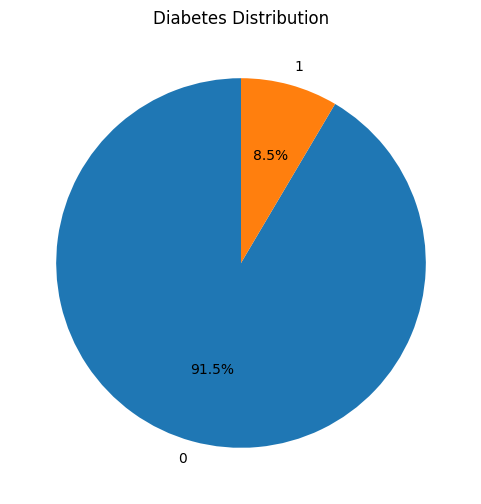

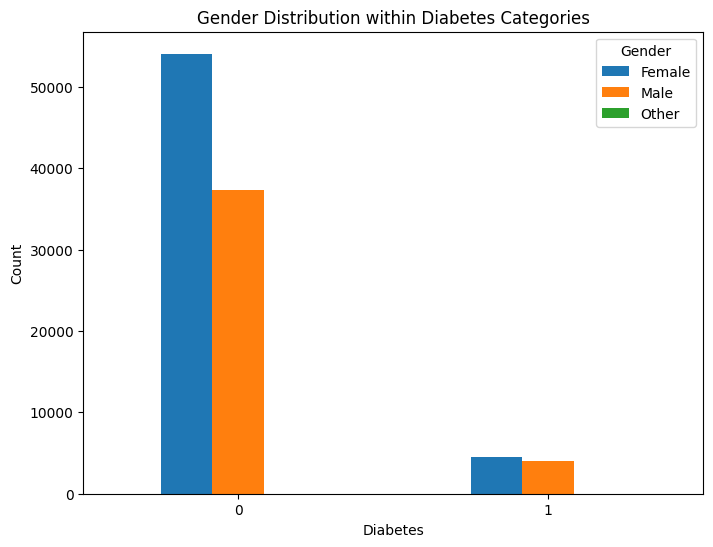

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load your dataset
data = pd.read_csv('diabetes_prediction_dataset.csv.zip')

# 2. Pie chart for diabetes distribution
diabetes_counts = data['diabetes'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Diabetes Distribution')
plt.show()

# 3. Bar chart for gender distribution within diabetes categories
gender_diabetes = data.groupby(['diabetes', 'gender'])['gender'].count().unstack()
gender_diabetes.plot(kind='bar', figsize=(8, 6))
plt.title('Gender Distribution within Diabetes Categories')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split as split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## **Split dataset**

In [ ]:
from sklearn.model_selection import train_test_split

# Features and target
features = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
target = 'diabetes'
X = df[features]
y = df[target]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Print shapes
print(f"Original data has {x_train.shape[0]} train data and {x_test.shape[0]} test data\n")

Original data has 80000 train data and 20000 test data



### **DecisionTreeClassifier**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. Load your dataset
data = pd.read_csv('/content/diabetes_prediction_dataset.csv.zip', compression='zip')

# 2. Encode categorical features
# Convert 'gender' to numeric (e.g., Male -> 0, Female -> 1)
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1})

# Use one-hot encoding for 'smoking_history' (if necessary)
data = pd.get_dummies(data, columns=['smoking_history'], drop_first=True)

# 3. Define feature columns and target column
features = ['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level'] + \
           [col for col in data.columns if col.startswith('smoking_history_')]
target = 'diabetes'

# 4. Create feature matrix (X) and target vector (y)
X = data[features]
y = data[target]

# 5. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Create and train a Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# 7. Make predictions on the test set
y_pred = classifier.predict(X_test)

# 8. Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.95


**Random Forest Classifier**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# 1. Load your dataset (replace 'your_dataset.csv' with the actual file name)
data = pd.read_csv('/content/diabetes_prediction_dataset.csv.zip')  # Assuming your dataset is in a zip file

# 2. Define features and target
features = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
target = 'diabetes'

# 3. Encode categorical variables
# Label encode 'gender' (binary column)
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])  # Converts 'Male' -> 0, 'Female' -> 1 (or vice versa)

# Apply one-hot encoding to the 'smoking_history' column
data = pd.get_dummies(data, columns=['smoking_history'], drop_first=True)

# 4. Update the features list to reflect the new column names
# After one-hot encoding, the column 'smoking_history' will be replaced with new columns, so we need to update 'features'
updated_features = [col for col in data.columns if col != target]  # Include all columns except the target

# 5. Create feature matrix (X) and target vector (y)
X = data[updated_features]
y = data[target]

# 6. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Create and train the Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# 8. Make predictions on the test set
y_pred = classifier.predict(X_test)

# 9. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.97015


**SVC**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


# 1. Load your dataset
data = pd.read_csv('/content/diabetes_prediction_dataset.csv.zip')

# 2. Handle missing values and encode categorical features
data = data.dropna()  # Drop rows with missing values (alternative: fillna())

label_enc = LabelEncoder()
categorical_columns = ['gender', 'smoking_history']  # Adjust based on your dataset
for col in categorical_columns:
    data[col] = label_enc.fit_transform(data[col])

# 3. Define features (X) and target (y)
X = data.drop(columns=['diabetes'])  # Features
y = data['diabetes']  # Target column

# 4. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# 5. Normalize/standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Apply the same scaling to the test data

# 6. Create and train the SVC classifier
classifier = SVC(kernel='linear', random_state=42)  # You can adjust the kernel and other parameters
classifier.fit(X_train, y_train)

# 7. Make predictions on the test set
y_pred = classifier.predict(X_test)

# 8. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9619


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Load your dataset
data = pd.read_csv('diabetes_prediction_dataset.csv.zip')

# 2. Dropping rows with missing values
data = data.dropna()

# 3. Encoding categorical columns
label_enc = LabelEncoder()
categorical_columns = ['gender', 'smoking_history']  # Updated for diabetes dataset
for col in categorical_columns:
    data[col] = label_enc.fit_transform(data[col])

# 4. Defining features (X) and target (y)
X = data.drop(columns=['diabetes'])  # Updated target column name
y = data['diabetes']

# 5. Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# 6. Standardizing the data (Optional for Random Forest, but can be used)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Training the model - Changed to RandomForestClassifier
model = RandomForestClassifier(random_state=50)
model.fit(X_train, y_train)

# 8. Making predictions
y_pred = model.predict(X_test)

# 9. Calculating accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# 10. Printing results
print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18297
           1       0.95      0.68      0.80      1703

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Load your dataset
data = pd.read_csv('diabetes_prediction_dataset.csv.zip')

# 2. Dropping rows with missing values
data = data.dropna()

# 3. Encoding categorical columns
label_enc = LabelEncoder()
categorical_columns = ['gender', 'smoking_history']  # Updated for diabetes dataset
for col in categorical_columns:
    data[col] = label_enc.fit_transform(data[col])

# 4. Defining features (X) and target (y)
X = data.drop(columns=['diabetes'])  # Updated target column name
y = data['diabetes']

# 5. Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# 6. Standardizing the data (Optional for Decision Tree, but can be used)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Training the model - Changed to DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=50)
model.fit(X_train, y_train)

# 8. Making predictions
y_pred = model.predict(X_test)

# 9. Calculating accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# 10. Printing results
print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18297
           1       0.72      0.74      0.73      1703

    accuracy                           0.95     20000
   macro avg       0.85      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# 1. Load your dataset
data = pd.read_csv('diabetes_prediction_dataset.csv.zip')

# 2. Dropping rows with missing values
data = data.dropna()

# 3. Encoding categorical columns
label_enc = LabelEncoder()
categorical_columns = ['gender', 'smoking_history']  # Updated for diabetes dataset
for col in categorical_columns:
    data[col] = label_enc.fit_transform(data[col])

# 4. Defining features (X) and target (y)
X = data.drop(columns=['diabetes'])  # Updated target column name
y = data['diabetes']

# 5. Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# 6. Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Training the model
model = SVC(random_state=50)
model.fit(X_train, y_train)

# 8. Making predictions
y_pred = model.predict(X_test)

# 9. Calculating accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# 10. Printing results
print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18297
           1       0.98      0.59      0.74      1703

    accuracy                           0.96     20000
   macro avg       0.97      0.80      0.86     20000
weighted avg       0.96      0.96      0.96     20000



Confussion Matrix


Confusion Matrix:
[[18224    73]
 [  689  1014]]


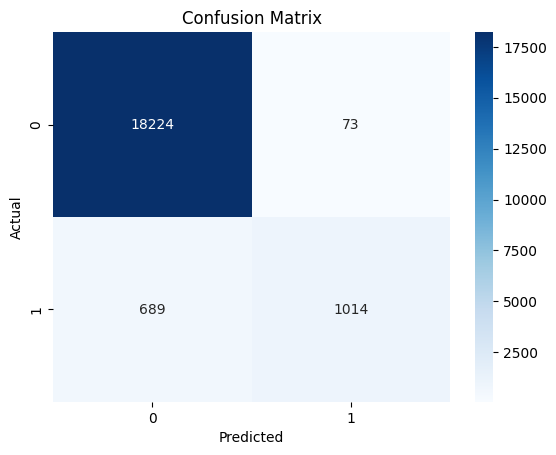

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# ... (Previous code for loading, preprocessing, splitting, training the SVC model) ...

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# (Optional) Visualize the confusion matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

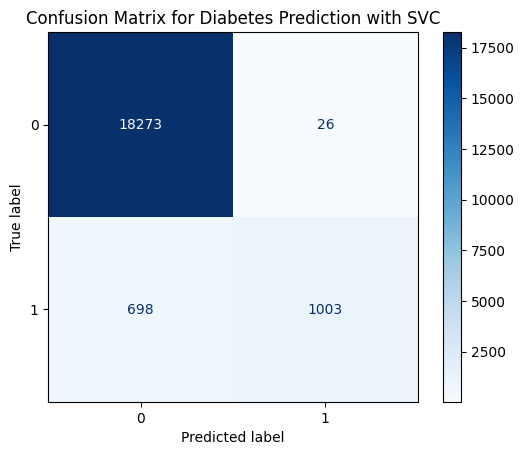

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Load and preprocess the dataset
data = pd.read_csv('diabetes_prediction_dataset.csv.zip')
data = data.dropna()  # Drop rows with missing values (alternative: fillna())

label_enc = LabelEncoder()
categorical_columns = ['gender', 'smoking_history']  # Adjust based on your dataset
for col in categorical_columns:
    data[col] = label_enc.fit_transform(data[col])

# 2. Prepare features and target
X = data.drop("diabetes", axis=1)  # Features
y = data["diabetes"]  # Target

# 3. Split the dataset
x_train, x_test, y_train, y_test = split(X, y, test_size=0.20, random_state=1)

# 4. Normalize/standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 5. Create and train the SVC model
svc = SVC(random_state=50)
svc.fit(x_train, y_train)

# 6. Make predictions
y_pred = svc.predict(x_test)

# 7. Compute and visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Diabetes Prediction with SVC')
plt.show()

**Data Cleaning**

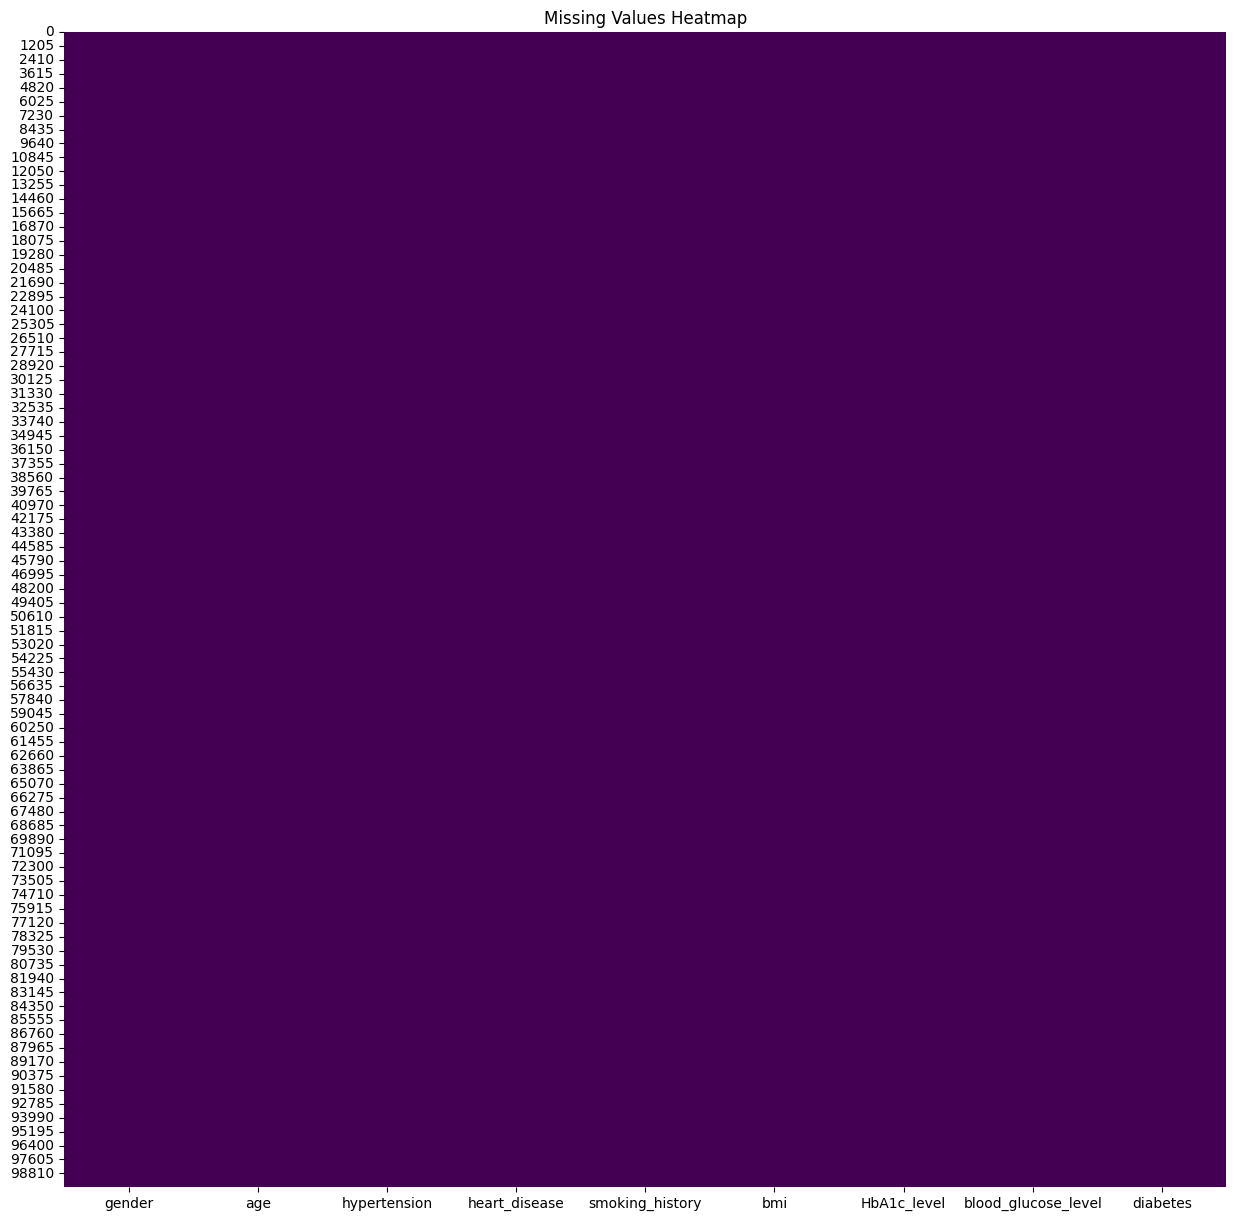

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load your dataset
data = pd.read_csv('diabetes_prediction_dataset.csv.zip')

# 2. Create the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
df.shape[0]

100000

In [ ]:
null_var = df.isnull().sum()/df.shape[0] *100
null_var

,0
gender,0.0
age,0.0
hypertension,0.0
heart_disease,0.0
smoking_history,0.0
bmi,0.0
HbA1c_level,0.0
blood_glucose_level,0.0
diabetes,0.0


In [ ]:
null_var

,0
gender,0.0
age,0.0
hypertension,0.0
heart_disease,0.0
smoking_history,0.0
bmi,0.0
HbA1c_level,0.0
blood_glucose_level,0.0
diabetes,0.0


In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print(null_var)

gender                 0.0
age                    0.0
hypertension           0.0
heart_disease          0.0
smoking_history        0.0
bmi                    0.0
HbA1c_level            0.0
blood_glucose_level    0.0
diabetes               0.0
dtype: float64


In [ ]:
drop_columns  = null_var[null_var >10].keys()
drop_columns

Index([], dtype='object')

In [ ]:
df2_drop_clm =df.drop(columns=drop_columns)

In [ ]:
df2_drop_clm.shape

(100000, 9)

<Axes: >

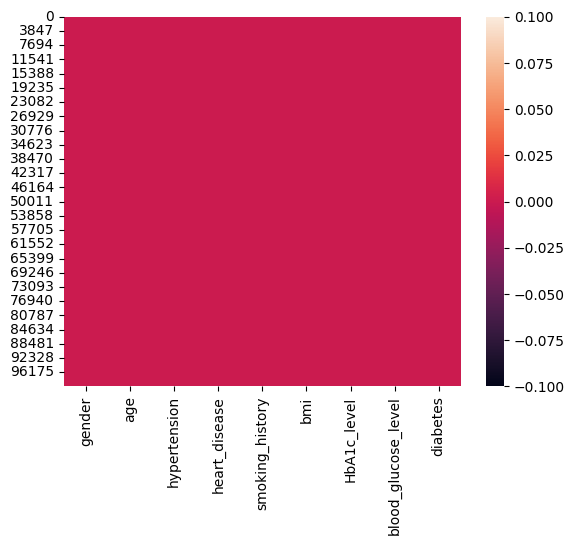

In [ ]:
sns.heatmap(df2_drop_clm.isnull())

In [ ]:
df3_drop_rows = df2_drop_clm.dropna()

In [ ]:
df3_drop_rows.shape

(100000, 9)

<Axes: >

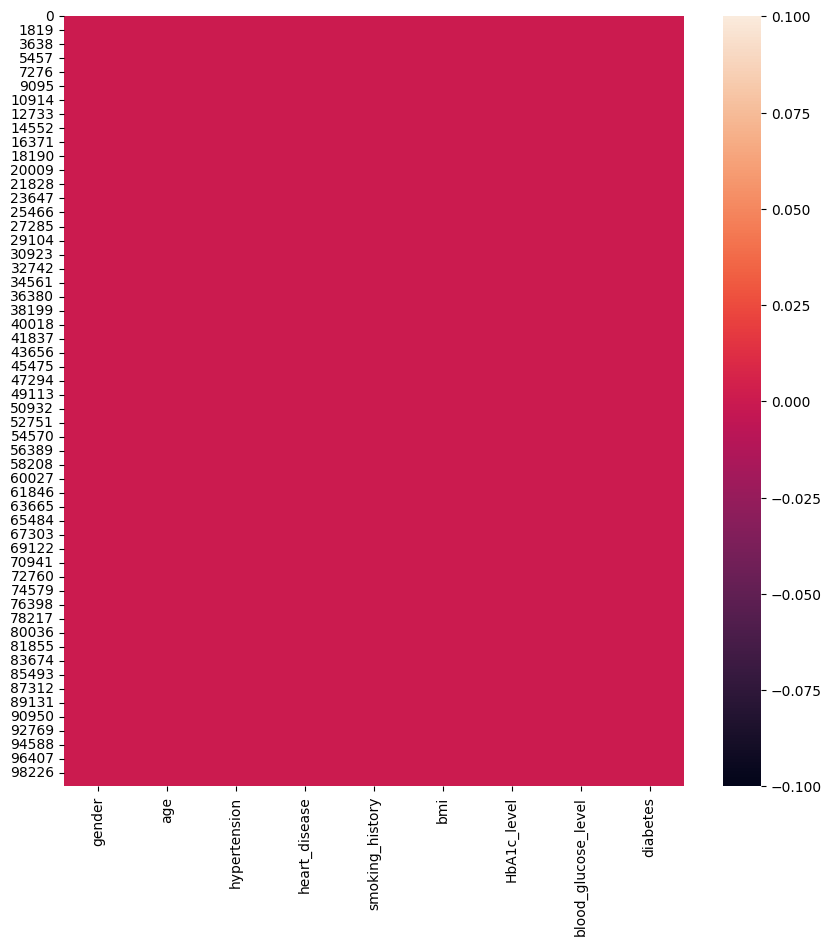

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df3_drop_rows.isnull())

In [ ]:
df3_drop_rows.isnull().sum().sum()

0

In [ ]:
df3_drop_rows.select_dtypes(include=['int64','float64']).columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

### Boxplot

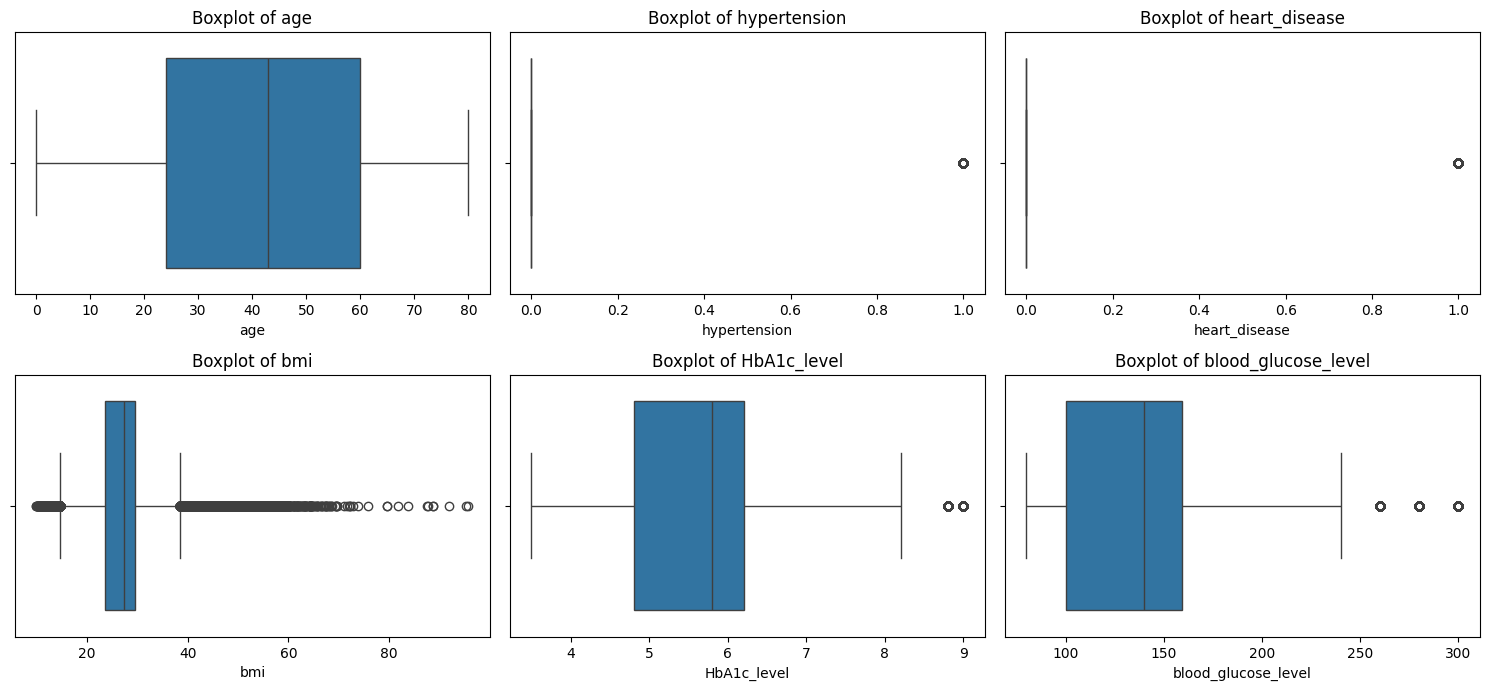

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot (adjusted for your dataset)
features = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Assuming 'data' is your DataFrame (loaded as in previous examples)
plt.figure(figsize=(15, 10))

for i, col in enumerate(features, 1):
    plt.subplot(len(features) // 3 + 1, 3, i)
    sns.boxplot(x=data[col])  # Use 'data' instead of 'df'
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

### ***count_outliers***

In [ ]:
import pandas as pd

# 1. Load your dataset
data = pd.read_csv('diabetes_prediction_dataset.csv.zip')

# 2. Function to count outliers using IQR (no changes needed)
def count_outliers(df):
    outlier_counts = {}
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
            outlier_counts[col] = outliers
    outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier Count'])
    return outlier_counts_df.sort_values(by='Outlier Count', ascending=False)

# 3. Get the outlier counts for your dataset
outlier_counts = count_outliers(data)  # Use 'data' instead of 'df'
print(outlier_counts)

                Column  Outlier Count
6             diabetes           8500
1         hypertension           7485
3                  bmi           7086
2        heart_disease           3942
5  blood_glucose_level           2038
4          HbA1c_level           1315
0                  age              0


### ***cap_outliers***

In [ ]:
import pandas as pd
import numpy as np

# 1. Load your dataset
data = pd.read_csv('diabetes_prediction_dataset.csv.zip')

# 2. Function to cap outliers (no changes needed)
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# 3. Identify numeric columns and cap outliers
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns  # Use 'data' instead of 'df'
data_capped = cap_outliers(data, numeric_cols)  # Use 'data' instead of 'df'

# 4. Save or display the modified dataframe
data_capped.to_csv('diabetes_prediction_capped.csv', index=False)  # Change file name
print(data_capped.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0           0.0            0.0           never  25.19   
1  Female  54.0           0.0            0.0         No Info  27.32   
2    Male  28.0           0.0            0.0           never  27.32   
3  Female  36.0           0.0            0.0         current  23.45   
4    Male  76.0           0.0            0.0         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                140.0       0.0  
1          6.6                 80.0       0.0  
2          5.7                158.0       0.0  
3          5.0                155.0       0.0  
4          4.8                155.0       0.0  


In [ ]:
import pandas as pd

# 1. Load your dataset
data = pd.read_csv('diabetes_prediction_dataset.csv.zip')

# 2. Identify numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns

# 3. Capping outliers at 1.5*IQR for numeric columns only
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

data_capped = data.copy()  # Create a copy to avoid modifying the original DataFrame
data_capped[numeric_cols] = data_capped[numeric_cols].apply(lambda x: x.clip(lower=Q1[x.name] - 1.5 * IQR[x.name],
                                                                           upper=Q3[x.name] + 1.5 * IQR[x.name]))

# 4. (Optional) Print or save the modified DataFrame
print(data_capped.head())
# data_capped.to_csv('diabetes_prediction_capped.csv', index=False)

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              0           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             0              0         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                140.0         0  
1          6.6                 80.0         0  
2          5.7                158.0         0  
3          5.0                155.0         0  
4          4.8                155.0         0  


In [ ]:
import pandas as pd

# 1. Load your dataset
data = pd.read_csv('diabetes_prediction_dataset.csv.zip')

# 2. Identify numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns

# 3. Calculate IQR for numeric columns
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# 4. Remove outliers from numeric columns
data_no_outliers = data[~((data[numeric_cols] < (Q1 - 1.5 * IQR)) | (data[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# 5. (Optional) Print or save the modified DataFrame
print(data_no_outliers.head())
# data_no_outliers.to_csv('diabetes_prediction_no_outliers.csv', index=False)

   gender   age  hypertension  heart_disease smoking_history    bmi  \
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
5  Female  20.0             0              0           never  27.32   
7  Female  79.0             0              0         No Info  23.86   

   HbA1c_level  blood_glucose_level  diabetes  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
5          6.6                   85         0  
7          5.7                   85         0  


## **SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Show the result of resampling
print("Original dataset class distribution:")
print(y.value_counts())

print("\nResampled dataset class distribution:")
print(pd.Series(y_smote).value_counts())

Original dataset class distribution:
diabetes
0    91500
1     8500
Name: count, dtype: int64

Resampled dataset class distribution:
diabetes
0    91500
1    91500
Name: count, dtype: int64


### **Random Forest Accuracy After SMOTE**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# ... (Your previous code for loading and preprocessing data) ...

# 1. Apply SMOTE
smote = SMOTE(random_state=42)  # You can adjust the random_state
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)  # Create resampled data

# 2. Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 3. Train the model using resampled data
rf_model.fit(X_train_res, y_train_res)

# 4. Make predictions on the original test set (X_test)
y_pred_rf = rf_model.predict(X_test)

# 5. Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy with SMOTE:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy with SMOTE: 0.9614
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18297
           1       0.79      0.75      0.77      1703

    accuracy                           0.96     20000
   macro avg       0.88      0.86      0.87     20000
weighted avg       0.96      0.96      0.96     20000



### **SVC with SMOTE**

In [ ]:
# Import required libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# 1. Load and preprocess your dataset
data = pd.read_csv('diabetes_prediction_dataset.csv.zip')

# 2. Handle categorical features (if any)
label_enc = LabelEncoder()
categorical_columns = ['gender', 'smoking_history']  # Adjust based on your dataset
for col in categorical_columns:
    data[col] = label_enc.fit_transform(data[col])

# 3. Define features (X) and target (y)
X = data.drop(columns=['diabetes'])
y = data['diabetes']

# 4. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 6. Scale the data
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)  # Use the same scaler for test data

# 7. Initialize and train the SVC model
svc_model = SVC(kernel='linear', random_state=42)
svc_model.fit(X_train_res, y_train_res)

# 8. Make predictions and evaluate the model
y_pred_svc = svc_model.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

# 9. Print the results
print("SVC Accuracy with SMOTE:", accuracy_svc)
print(classification_report(y_test, y_pred_svc))


SVC Accuracy with SMOTE: 0.87985
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     18292
           1       0.40      0.85      0.55      1708

    accuracy                           0.88     20000
   macro avg       0.69      0.87      0.74     20000
weighted avg       0.94      0.88      0.90     20000



## **Decision Tree Accuracy with SMOTE**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder


# 1. Load and preprocess the dataset
data = pd.read_csv('diabetes_prediction_dataset.csv.zip')

# 2. Handle categorical features
label_enc = LabelEncoder()
categorical_columns = ['gender', 'smoking_history']
for col in categorical_columns:
    data[col] = label_enc.fit_transform(data[col])

# 3. Define features and target
X = data.drop(columns=['diabetes'])
y = data['diabetes']

# 4. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Apply SMOTE to the training data ONLY
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 6. Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_res, y_train_res)

# 7. Make predictions and evaluate
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy with SMOTE:", accuracy_dt)
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy with SMOTE: 0.9479
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.68      0.74      0.71      1708

    accuracy                           0.95     20000
   macro avg       0.83      0.85      0.84     20000
weighted avg       0.95      0.95      0.95     20000



## **ADASYN **

In [ ]:
from imblearn.over_sampling import ADASYN

# Create an ADASYN instance
adasyn = ADASYN(random_state=42)

# Resample the dataset
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

# Print the shapes of the original and resampled datasets
print("Original dataset shape:", X.shape, y.shape)
print("Resampled dataset shape:", X_adasyn.shape, y_adasyn.shape)

Original dataset shape: (100000, 8) (100000,)
Resampled dataset shape: (183556, 8) (183556,)


**Decision Tree with ADASYN Accuracy**

In [ ]:
dt_model.fit(X_adasyn, y_adasyn)
y_pred = dt_model.predict(X_test)
print("Decision Tree with ADASYN Accuracy:", accuracy_score(y_test, y_pred))

Decision Tree with ADASYN Accuracy: 0.99855


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report  # Import classification_report
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import LabelEncoder

# 1. Load and preprocess your dataset
data = pd.read_csv('diabetes_prediction_dataset.csv.zip')

# 2. Handle categorical features
label_enc = LabelEncoder()
categorical_columns = ['gender', 'smoking_history']
for col in categorical_columns:
    data[col] = label_enc.fit_transform(data[col])

# 3. Define features (X) and target (y)
X = data.drop(columns=['diabetes'])
y = data['diabetes']

# 4. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Apply ADASYN to the training data ONLY
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# 6. Initialize and train the Decision Tree model with resampled data
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

# 7. Make predictions on the test set
y_pred = dt_model.predict(X_test)

# 8. Evaluate the model
print("Decision Tree with ADASYN Accuracy:", accuracy_score(y_test, y_pred))

# 9. Print classification report with precision, recall, F1-score, and support
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Decision Tree with ADASYN Accuracy: 0.95045

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.70      0.74      0.72      1708

    accuracy                           0.95     20000
   macro avg       0.84      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Import SVC
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import LabelEncoder, StandardScaler # Import StandardScaler

# 1. Load and preprocess your dataset
data = pd.read_csv('diabetes_prediction_dataset.csv.zip')

# 2. Handle categorical features
label_enc = LabelEncoder()
categorical_columns = ['gender', 'smoking_history']
for col in categorical_columns:
    data[col] = label_enc.fit_transform(data[col])

# 3. Define features (X) and target (y)
X = data.drop(columns=['diabetes'])
y = data['diabetes']

# 4. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Apply ADASYN to the training data ONLY
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# 6. Scale the data (important for SVC)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# 7. Initialize and train the SVC model with resampled data
svc_model = SVC(random_state=42)  # Initialize SVC
svc_model.fit(X_train_resampled, y_train_resampled)

# 8. Make predictions on the test set
y_pred = svc_model.predict(X_test)

# 9. Evaluate the model
print("SVC with ADASYN Accuracy:", accuracy_score(y_test, y_pred))

# 10. Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

SVC with ADASYN Accuracy: 0.83185

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.82      0.90     18292
           1       0.33      0.94      0.49      1708

    accuracy                           0.83     20000
   macro avg       0.66      0.88      0.69     20000
weighted avg       0.94      0.83      0.86     20000



**SVC with ADASYN Accuracy**

In [ ]:
from sklearn.feature_selection import f_classif, SelectKBest

anova_selector = SelectKBest(f_classif, k='all')
anova_selector.fit(X, y)
print("ANOVA Scores:", anova_selector.scores_)

ANOVA Scores: [  140.15241     7131.40585213  4072.70687466  3038.55956375
   897.01711575  4816.11393219 19122.21118355 21363.05436142]


### ** Feature Selection :**

## ANOVA Scores

In [ ]:
from sklearn.feature_selection import f_classif, SelectKBest

anova_selector = SelectKBest(f_classif, k='all')
anova_selector.fit(X, y)
print("ANOVA Scores:", anova_selector.scores_)

ANOVA Scores: [  140.15241     7131.40585213  4072.70687466  3038.55956375
   897.01711575  4816.11393219 19122.21118355 21363.05436142]


## Chi-Square Scores

In [ ]:
from sklearn.feature_selection import chi2

chi_selector = SelectKBest(chi2, k='all')
chi_selector.fit(X, y)
print("Chi-Square Scores:", chi_selector.scores_)


Chi-Square Scores: [8.20451420e+01 8.05767223e+04 3.62048542e+03 2.83276107e+03
 1.45648777e+03 7.40789884e+03 3.32913937e+03 2.11290675e+05]


## **RFE**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Recursive Feature Elimination
rfe = RFE(estimator=rf_model, n_features_to_select=5)
rfe.fit(X, y)

# Selected features and ranking
print("Ranking of features:", rfe.ranking_)
print("Support for selected features:", rfe.support_)


Ranking of features: [4 1 2 3 1 1 1 1]
Support for selected features: [False  True False False  True  True  True  True]


## * Random Forest model ,Decision Tree model ** **bold text**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Step 1: Load your diabetes dataset
data = pd.read_csv('diabetes_prediction_dataset.csv.zip')

# Step 1.5: Preprocess categorical features (if any)
# Assuming 'gender' and 'smoking_history' are categorical
label_encoder = LabelEncoder()
categorical_features = ['gender', 'smoking_history']
for feature in categorical_features:
    data[feature] = label_encoder.fit_transform(data[feature])

# Step 2: Define features (X) and target (y)
X = data.drop(columns=['diabetes'])  # Features (all columns except 'diabetes')
y = data['diabetes']  # Target variable ('diabetes' column)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize the models
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

# Step 5: Train the Random Forest model
rf_model.fit(X_train, y_train)

# Step 6: Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Step 7: Make predictions
rf_predictions = rf_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)

# Step 8: Evaluate the models
rf_accuracy = accuracy_score(y_test, rf_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)

# Step 9: Print classification reports for more detailed metrics
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_predictions))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, dt_predictions))

Random Forest Accuracy: 0.97065
Decision Tree Accuracy: 0.95245

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.71      0.74      0.73      1708

    accuracy                           0.95     20000
   macro avg       0.84      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000



### **Hyperparameter Tuning**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder if needed

# Step 1: Load your diabetes dataset
data = pd.read_csv('diabetes_prediction_dataset.csv.zip')

# Step 1.5: Preprocess categorical features (if any)
# Assuming 'gender' and 'smoking_history' are categorical
label_encoder = LabelEncoder()
categorical_features = ['gender', 'smoking_history']
for feature in categorical_features:
    data[feature] = label_encoder.fit_transform(data[feature])

# Step 2: Define features (X) and target (y)
X = data.drop(columns=['diabetes'])  # Features (all columns except 'diabetes')
y = data['diabetes']  # Target variable ('diabetes' column)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Step 5: Define parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Step 6: Initialize and perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model,
                                   param_distributions=param_grid,
                                   cv=5,  # Number of cross-validation folds
                                   n_iter=10,  # Number of parameter settings sampled
                                   scoring='accuracy',  # Evaluation metric
                                   random_state=42,
                                   n_jobs=-1)  # Use all available cores

random_search.fit(X_train, y_train)

# Step 7: Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Step 8: Evaluate the best model on the test set
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Step 9: Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
Best Score: 0.9718249999999999
Test Set Accuracy: 0.9723

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.68      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



## 10-Fold Cross-Validation Scores

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder if needed


# ... (Your previous code for loading and preprocessing data, and defining X and y) ...


# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)  # Or use your best_rf_model

# Cross-validation with k=10
cv_scores_10 = cross_val_score(rf_model, X, y, cv=10)  # Use X and y directly
print("10-Fold Cross-Validation Scores:", cv_scores_10)
print("Mean Accuracy (k=10):", cv_scores_10.mean())

10-Fold Cross-Validation Scores: [0.9698 0.9704 0.9712 0.9708 0.9674 0.9679 0.9716 0.9696 0.9692 0.9708]
Mean Accuracy (k=10): 0.96987


## **Calculate ROC curve**

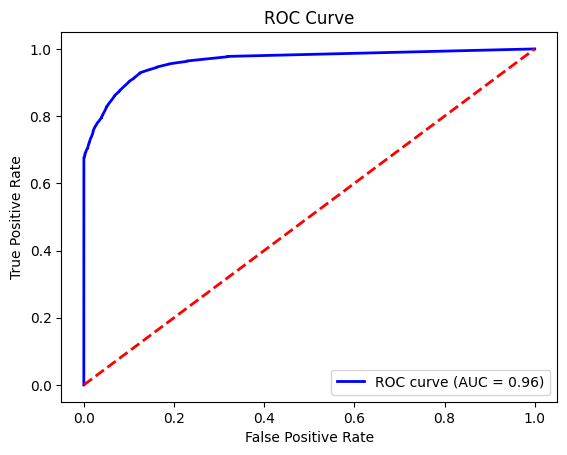

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Step 1: Load your diabetes dataset
data = pd.read_csv('diabetes_prediction_dataset.csv.zip')

# Step 1.5: Preprocess categorical features (if any)
# Assuming 'gender' and 'smoking_history' are categorical
label_encoder = LabelEncoder()
categorical_features = ['gender', 'smoking_history']
for feature in categorical_features:
    data[feature] = label_encoder.fit_transform(data[feature])

# Step 2: Define features (X) and target (y)
X = data.drop(columns=['diabetes'])  # Features (all columns except 'diabetes')
y = data['diabetes']  # Target variable ('diabetes' column)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Predict probabilities for the positive class
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Step 6: Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Step 7: Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## **AUC Score**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score  # Import roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Step 1: Load your diabetes dataset
data = pd.read_csv('diabetes_prediction_dataset.csv.zip')

# Step 1.5: Preprocess categorical features (if any)
# Assuming 'gender' and 'smoking_history' are categorical
label_encoder = LabelEncoder()
categorical_features = ['gender', 'smoking_history']
for feature in categorical_features:
    data[feature] = label_encoder.fit_transform(data[feature])

# Step 2: Define features (X) and target (y)
X = data.drop(columns=['diabetes'])  # Features (all columns except 'diabetes')
y = data['diabetes']  # Target variable ('diabetes' column)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Predict probabilities for the positive class
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Step 6: Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc_score)

AUC Score: 0.9636997380767165


## **Web**

In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 1: Load your diabetes dataset
data = pd.read_csv('diabetes_prediction_dataset.csv.zip')

# Step 1.5: Preprocess categorical features (if any)
# Assuming 'gender' and 'smoking_history' are categorical
label_encoder = LabelEncoder()
categorical_features = ['gender', 'smoking_history']
for feature in categorical_features:
    data[feature] = label_encoder.fit_transform(data[feature])

# Step 2: Define features (X) and target (y)
X = data.drop(columns=['diabetes'])  # Features (all columns except 'diabetes')
y = data['diabetes']  # Target variable ('diabetes' column)

# Step 3: Split the dataset into training and testing sets (optional, if you want to evaluate before saving)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 5: Save the model to a file
with open('diabetes_model.pkl', 'wb') as file:  # Change filename if desired
    pickle.dump(model, file)

# Output confirmation
print("Model saved successfully to 'diabetes_model.pkl'")

Model saved successfully to 'diabetes_model.pkl'


In [ ]:
def display_thank_you_message():
    """Displays a thank you message with diabetes care advice."""
    message = """
    Thank you for using our Diabetes Prediction Tool!

    We hope this information helps you make informed decisions about your health.

    Remember to:
    * Consult with your doctor for personalized advice.
    * Take care of yourself and manage your diabetes effectively.
    * Monitor your blood sugar levels regularly.
    * Follow a healthy diet and exercise plan.

    Take care of your health and stay well!
    """
    print(message)

In [ ]:
display_thank_you_message()


    Thank you for using our Diabetes Prediction Tool!

    We hope this information helps you make informed decisions about your health.

    Remember to:
    * Consult with your doctor for personalized advice.
    * Take care of yourself and manage your diabetes effectively.
    * Monitor your blood sugar levels regularly.
    * Follow a healthy diet and exercise plan.

    Take care of your health and stay well!
    
